<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #CC99FF;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Housing prices <br>
    (EDA / Machine learning)
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/danish-residential-housing-prices-1992-2024/DKHousingPricesSample100k.csv
/kaggle/input/danish-residential-housing-prices-1992-2024/DKHousingPrices.parquet


# Read Dataset

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/danish-residential-housing-prices-1992-2024/DKHousingPricesSample100k.csv')
df.head(5)

date quarter  house_id house_type    sales_type  year_build  \
0  2024-10-24  2024Q4        16      Villa  regular_sale        1997   
1  2024-10-24  2024Q4        13  Apartment  regular_sale        1885   
2  2024-10-23  2024Q4        60      Villa  regular_sale        1949   
3  2024-10-23  2024Q4        29      Villa  regular_sale        2001   
4  2024-10-22  2024Q4        92  Apartment  regular_sale        1965   

   purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
0         6500000                                 -3.0         5  142.0   
1         3400000                                  0.0         2   46.0   
2         4550000                                 -4.0         4  112.0   
3         1630000                                -12.0         4  186.0   
4         1975000                                -10.0         3   82.0   

   sqm_price                          address  zip_code             city  \
0  45774.650                     Spættevej 16      2680    Solrød Strand   
1  73913.050  Jakob Dannefærds Vej 10B, 4. th      1973  Frederiksberg C   
2  40625.000             Vestre Plantagevej 3      2680    Solrød Strand   
3   8763.440                     Toftebjerg 3      4400       Kalundborg   
4  24085.365        Ryttergårdsvej 20, 1. 113      3520            Farum   

                  area   region  nom_interest_rate%  dk_ann_infl_rate%  \
0  Capital, Copenhagen  Zealand                 3.1                NaN   
1  Capital, Copenhagen  Zealand                 3.1                NaN   
2  Capital, Copenhagen  Zealand                 3.1                NaN   
3        Other islands  Zealand                 3.1                NaN   
4        North Zealand  Zealand                 3.1                NaN   

   yield_on_mortgage_credit_bonds%  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   date                                 100000 non-null  object 
 1   quarter                              100000 non-null  object 
 2   house_id                             100000 non-null  int64  
 3   house_type                           100000 non-null  object 
 4   sales_type                           100000 non-null  object 
 5   year_build                           100000 non-null  int64  
 6   purchase_price                       100000 non-null  int64  
 7   %_change_between_offer_and_purchase  100000 non-null  float64
 8   no_rooms                             100000 non-null  int64  
 9   sqm                                  100000 non-null  float64
 10  sqm_price                            100000 non-null  float64
 11  address       

In [4]:
df.describe().T

count          mean           std  \
house_id                             100000.0  7.531364e+05  4.348902e+05   
year_build                           100000.0  1.955079e+03  4.570358e+01   
purchase_price                       100000.0  1.925992e+06  1.777832e+06   
%_change_between_offer_and_purchase  100000.0 -2.084740e+00  4.852926e+00   
no_rooms                             100000.0  4.375790e+00  1.661686e+00   
sqm                                  100000.0  1.293878e+02  5.717062e+01   
sqm_price                            100000.0  1.640665e+04  1.365518e+04   
zip_code                             100000.0  5.951613e+03  2.369938e+03   
nom_interest_rate%                   100000.0  1.679263e+00  2.048078e+00   
dk_ann_infl_rate%                     99923.0  1.927025e+00  1.638440e+00   
yield_on_mortgage_credit_bonds%       99923.0  4.107445e+00  2.194428e+00   

                                             min            25%          50%  \
house_id                                 13.0000  377072.250000   751103.500   
year_build                             1000.0000    1931.000000     1966.000   
purchase_price                       250200.0000  800000.000000  1400000.000   
%_change_between_offer_and_purchase     -49.0000      -3.000000        0.000   
no_rooms                                  1.0000       3.000000        4.000   
sqm                                      26.0000      89.000000      123.000   
sqm_price                               374.5498    6792.940775    12070.707   
zip_code                               1051.0000    4000.000000     5970.000   
nom_interest_rate%                        0.0000       0.000000        0.750   
dk_ann_infl_rate%                         0.2500       0.790000        1.850   
yield_on_mortgage_credit_bonds%           1.1000       2.120000        4.340   

                                              75%          max  
house_id                             1.128904e+06   1507901.00  
year_build                           1.980000e+03      2024.00  
purchase_price                       2.450000e+06  45955000.00  
%_change_between_offer_and_purchase  0.000000e+00        49.00  
no_rooms                             5.000000e+00        15.00  
sqm                                  1.600000e+02       984.00  
sqm_price                            2.134320e+04     75000.00  
zip_code                             8.250000e+03      9990.00  
nom_interest_rate%                   3.250000e+00         9.50  
dk_ann_infl_rate%                    2.340000e+00         7.70  
yield_on_mortgage_credit_bonds%      5.500000e+00        10.14

In [5]:
df.describe(include='object').T

count unique            top   freq
date        100000  11254     2023-12-19     49
quarter     100000    130         2021Q1   2263
house_type  100000      5          Villa  54214
sales_type  100000      4   regular_sale  88232
address     100000  92463      Vibevej 5     12
city         99989    607    København S   1275
area        100000      8  South jutland  22563
region      100000      4        Jutland  49937

# Data preprocessing

In [6]:
print('Duplicate values :',df.duplicated().sum())
print('Duplicate values (%) :', round(df.duplicated().sum() / len(df) * 100,2), '%')

df.drop_duplicates(inplace = True)
print('Duplicate values after removal:', df.duplicated().sum())
print('Duplicate values (%) after removal:', round(df.duplicated().sum() / len(df) * 100,2), '%')

Duplicate values : 0
Duplicate values (%) : 0.0 %
Duplicate values after removal: 0
Duplicate values (%) after removal: 0.0 %


In [7]:
print('Missing values\n')
print(df.isna().sum(),'\n')
print('Missing values (%)\n')
print(round(df.isna().sum() / len(df) * 100,2),'\n')

df.dropna(inplace = True)
print('Missing values after removal\n')
print(df.isna().sum(),'\n')
print('Missing values (%) after removal\n')
print(round(df.isna().sum() / len(df) * 100,2))

Missing values

date                                    0
quarter                                 0
house_id                                0
house_type                              0
sales_type                              0
year_build                              0
purchase_price                          0
%_change_between_offer_and_purchase     0
no_rooms                                0
sqm                                     0
sqm_price                               0
address                                 0
zip_code                                0
city                                   11
area                                    0
region                                  0
nom_interest_rate%                      0
dk_ann_infl_rate%                      77
yield_on_mortgage_credit_bonds%        77
dtype: int64 

Missing values (%)

date                                   0.00
quarter                                0.00
house_id                               0.00
house_type         

In [8]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

date quarter  house_id house_type    sales_type  year_build  \
0      2024-09-30  2024Q3      1229      Villa  regular_sale        1850   
1      2024-09-26  2024Q3      1723      Villa  regular_sale        1850   
2      2024-09-24  2024Q3      2058      Villa  regular_sale        1800   
3      2024-09-22  2024Q3     40444  Apartment  regular_sale        1778   
4      2024-09-19  2024Q3     40743      Villa  regular_sale        1575   
...           ...     ...       ...        ...           ...         ...   
36472  2022-01-02  2022Q1    215679  Townhouse  regular_sale        1951   
36473  2022-01-01  2022Q1    215854  Apartment  regular_sale        1962   
36474  2022-01-01  2022Q1    215835      Villa  regular_sale        1977   
36475  2022-01-01  2022Q1    215850  Apartment  regular_sale        1965   
36476  2022-01-01  2022Q1    215842  Apartment  regular_sale        1955   

       purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
0             1775000                                -13.0         5  160.0   
1             1130000                                 -6.0         5  115.0   
2              515000                                  6.0         5  104.0   
3            10000000                                  0.0         6  200.0   
4             1065000                                -11.0         5  162.0   
...               ...                                  ...       ...    ...   
36472         1050900                                  0.0         4   78.0   
36473         1900000                                 -5.0         3   68.0   
36474         2925000                                  0.0         7  215.0   
36475         1915000                                 -2.0         2   54.0   
36476         1800000                                -10.0         5  152.0   

       sqm_price                       address  zip_code         city  \
0      11093.750              Farvergårdsvej 6      3200     Helsinge   
1       9826.087                     Havvej 12      8420       Knebel   
2       4951.923               Maglehøjvej 213      4983    Dannemare   
3      50000.000      Lille Strandstræde 12, 2      1254  København K   
4       6574.074                 Søndergade 11      6270       Tønder   
...          ...                           ...       ...          ...   
36472  13473.077                    Saxovej 78      5210    Odense NV   
36473  27941.176      Roskildevænget 16, 1. th      4000     Roskilde   
36474  13604.651          Carl Nielsens Vej 16      5500   Middelfart   
36475  35462.965  Gladsaxe Møllevej 107, 2. tv      2860       Søborg   
36476  11842.105           Nørrebrogade 36B, 1      7100        Vejle   

                      area         region  nom_interest_rate%  \
0            North Zealand        Zealand                3.35   
1       East & mid jutland        Jutland                3.35   
2            Other islands        Zealand                3.35   
3      Capital, Copenhagen        Zealand                3.35   
4            South jutland        Jutland                3.35   
...                    ...            ...                 ...   
36472        Fyn & islands  Fyn & islands                0.00   
36473        Other islands        Zealand                0.00   
36474        Fyn & islands  Fyn & islands                0.00   
36475  Capital, Copenhagen        Zealand                0.00   
36476        South jutland        Jutland                0.00   

       dk_ann_infl_rate%  yield_on_mortgage_credit_bonds%  
0                   1.13                             4.34  
1                   1.13                             4.34  
2                   1.13                             4.34  
3                   1.13                             4.34  
4                   1.13                             4.34  
...                  ...                              ...  
36472               7.70                             3.73  
36473        

### Outliers were not removed for data interpretation

In [9]:
df.drop(['house_id'], axis=1, inplace = True)
df.dtypes

date                                    object
quarter                                 object
house_type                              object
sales_type                              object
year_build                               int64
purchase_price                           int64
%_change_between_offer_and_purchase    float64
no_rooms                                 int64
sqm                                    float64
sqm_price                              float64
address                                 object
zip_code                                 int64
city                                    object
area                                    object
region                                  object
nom_interest_rate%                     float64
dk_ann_infl_rate%                      float64
yield_on_mortgage_credit_bonds%        float64
dtype: object

In [10]:
import plotly.express as px


fig = px.histogram(df, x='purchase_price', title='Distribution of Purchase Prices')
fig.update_layout(
    plot_bgcolor='black', 
    paper_bgcolor='black', 
    font=dict(color='white'),  
    title='Real Estate Data Analysis',
    title_font=dict(color='white'),
)
fig.show()

fig2 = px.box(df, x='year_build', y='purchase_price', title='Purchase Price by Year Built')
fig2.update_layout(
    plot_bgcolor='black',  
    paper_bgcolor='black', 
    font=dict(color='white'), 
    title='Purchase Price by Year Built',
    title_font=dict(color='white'),
)
fig2.show()

fig3 = px.scatter(df, x='sqm', y='sqm_price', color='house_type', title='sqm vs sqm_price by House Type')
fig3.update_layout(
    plot_bgcolor='black',  
    paper_bgcolor='black', 
    font=dict(color='white'), 
    title='Purchase Price by Year Built',
    title_font=dict(color='white'),
)
fig3.show()

fig4 = px.bar(df.groupby('region')['purchase_price'].mean().reset_index(), x='region', y='purchase_price',
             title='Average Purchase Price by Region')
fig4.update_layout(
    plot_bgcolor='black',  
    paper_bgcolor='black', 
    font=dict(color='white'), 
    title='Purchase Price by Year Built',
    title_font=dict(color='white'),
)
fig4.show()

fig5 = px.histogram(df, x='%_change_between_offer_and_purchase', title='% Change Between Offer and Purchase')
fig5.update_layout(
    plot_bgcolor='black',  
    paper_bgcolor='black', 
    font=dict(color='white'), 
    title='Purchase Price by Year Built',
    title_font=dict(color='white'),
)
fig5.show()

fig6 = px.scatter(df, x='nom_interest_rate%', y='dk_ann_infl_rate%', color='sales_type',
                 title='Interest Rate vs Inflation Rate by Sales Type')
fig6.update_layout(
    plot_bgcolor='black',  
    paper_bgcolor='black', 
    font=dict(color='white'), 
    title='Purchase Price by Year Built',
    title_font=dict(color='white'),
)
fig6.show()

In [11]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

label_cols = ['date', 'quarter', 'house_type', 'sales_type', 'address', 'city', 'area', 'region']
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

scaler = RobustScaler()

scale_cols = ['year_build', 'purchase_price', '%_change_between_offer_and_purchase', 
              'no_rooms', 'sqm', 'sqm_price', 'zip_code', 'nom_interest_rate%', 
              'dk_ann_infl_rate%', 'yield_on_mortgage_credit_bonds%']

df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99912 entries, 77 to 99999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 99912 non-null  int64  
 1   quarter                              99912 non-null  int64  
 2   house_type                           99912 non-null  int64  
 3   sales_type                           99912 non-null  int64  
 4   year_build                           99912 non-null  float64
 5   purchase_price                       99912 non-null  float64
 6   %_change_between_offer_and_purchase  99912 non-null  float64
 7   no_rooms                             99912 non-null  float64
 8   sqm                                  99912 non-null  float64
 9   sqm_price                            99912 non-null  float64
 10  address                              99912 non-null  int64  
 11  zip_code                        

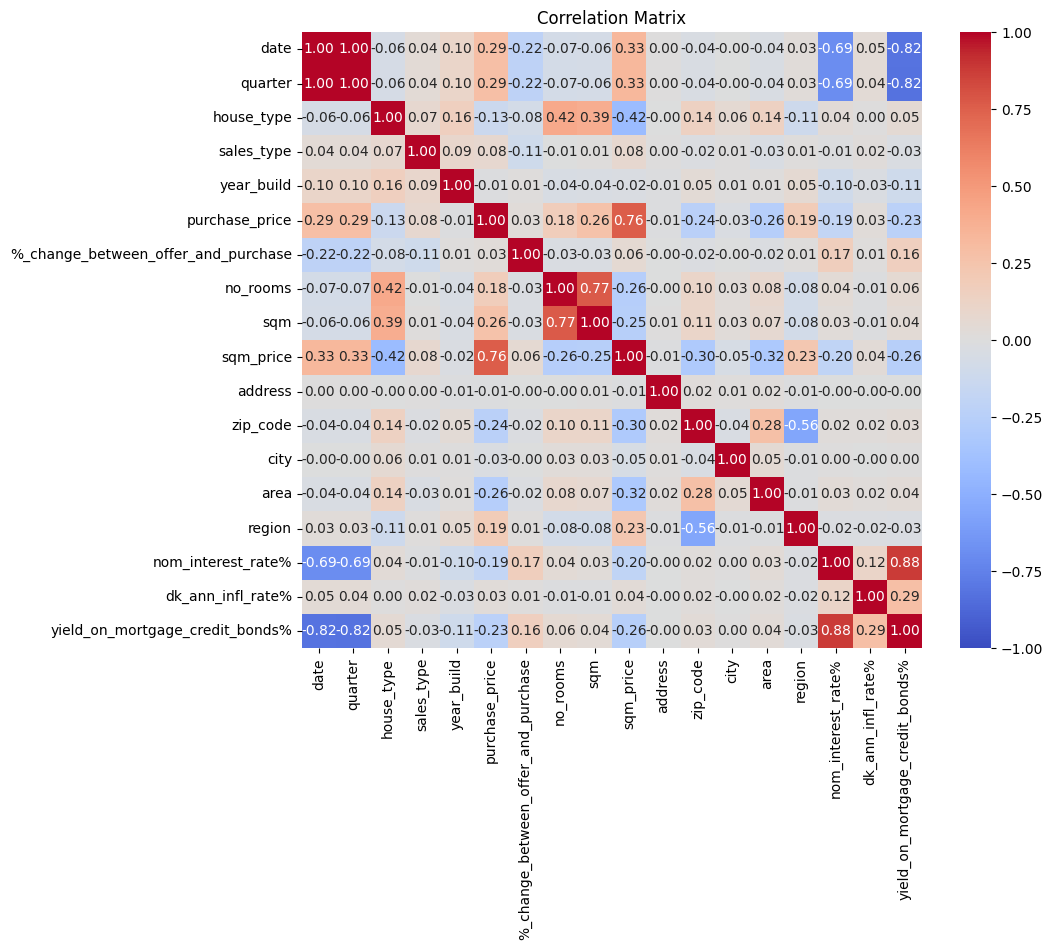

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

plt.title('Correlation Matrix')
plt.show()

### 'date' and 'quarter' are the same variable, So i will remove one.

In [13]:
df.drop(['quarter'], axis=1, inplace=True)

# Comparison of regression model performance

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X = df.drop('purchase_price', axis=1)
y = df['purchase_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
#  "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
#    "Decision Tree": DecisionTreeRegressor(random_state=42),
#    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
#    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
#    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

In [16]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

MSE        R²
Polynomial Regression  4.947705e-15  1.000000
XGBoost                5.716703e-03  0.995195
Linear Regression      2.349958e-01  0.802496
ElasticNet             2.665085e-01  0.776011
KNN                    1.367209e+00 -0.149080

In [17]:
fig_r2 = px.bar(
    results_df,
    x=results_df.index,
    y="R²",
    title="Model Performance (R²)",
    labels={"R²": "R² Score", "index": "Model"},
    color="R²",
    color_continuous_scale="Blues",
)
fig_r2.update_traces(marker=dict(opacity=0.8))
fig_r2.update_layout(
    xaxis_tickangle=45,  
    plot_bgcolor='black',  
    paper_bgcolor='black',  
    font=dict(color='white'),  
    title_font=dict(color='white') 
)
fig_r2.show()

fig_mse = px.bar(
    results_df,
    x=results_df.index,
    y="MSE",
    title="Model Performance (MSE)",
    labels={"MSE": "Mean Squared Error", "index": "Model"},
    color="MSE",
    color_continuous_scale="Oranges",
)
fig_mse.update_traces(marker=dict(opacity=0.8))
fig_mse.update_layout(
    xaxis_tickangle=45, 
    plot_bgcolor='black',  
    paper_bgcolor='black',  
    font=dict(color='white'),  
    title_font=dict(color='white') 
)
fig_mse.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)

Best Model:
MSE    4.947705e-15
R²     1.000000e+00
Name: Polynomial Regression, dtype: float64


### Use Polynomial Regression because Polynomial Regression model performs best

# Polynomial Regression

> ## Hyperparameter

In [18]:
Degree = 3  
list_MSE = []
list_R2 = []

for degree in range(1, Degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    list_MSE.append((degree, mse))
    list_R2.append((degree,r2))
    print(f'Degree {degree}: MSE = {mse}, R2 = {r2}')

Degree 1: MSE = 0.23499584101515764, R2 = 0.8024962692150854
Degree 2: MSE = 4.947705199680396e-15, R2 = 0.9999999999999959
Degree 3: MSE = 0.0006856487445938511, R2 = 0.9994237422054778


> ## Conclusion

In [19]:
import plotly.graph_objects as go

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_poly = model.predict(X_test_poly)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test, 
    y=y_pred_poly,  
    mode='markers',
    marker=dict(color='blue', size=8, line=dict(width=0.5, color='black')),
    name='Predictions'
))

fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    line=dict(color='red', dash='dash', width=2),
    name='Ideal (y=x)'
))

fig.update_layout(
    title='Actual vs Predicted Values (Polynomial Regression)',
    xaxis=dict(title='Actual Values'),
    yaxis=dict(title='Predicted Values'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=16, color='white'),
    showlegend=True
)

fig.show()

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression Result (Degree = 2) : MSE = {mse}, R² = {r2}')

Polynomial Regression Result (Degree = 2) : MSE = 4.947705199680396e-15, R² = 0.9999999999999959


# Thanks